In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import os
from matplotlib import font_manager as fm,rcParams
from highlight_text import htext
import matplotlib.patheffects as PathEffects
import seaborn as sns
sns.set()

In [2]:
ffpath = os.path.join(rcParams['datapath'],r"C:\Users\Ewan Barclay\Downloads\Roboto_Slab\static\RobotoSlab-Regular.ttf")
title_font = fm.FontProperties(fname=ffpath)
fpath2 = os.path.join(rcParams['datapath'],r"C:\Users\Ewan Barclay\Downloads\Roboto_Slab\static\RobotoSlab-Bold.ttf")
bold_font = fm.FontProperties(fname=fpath2)

In [3]:
df = pd.read_csv("odi_team_s2019.csv")
df.head()

,Team,Span,Mat,Won,Lost,Tied,NR,W/L,Ave,RPO,Inns,HS,LS
0,England,2020-2023,40,21,16,0,3,1.312,34.90,6.13,37,498,110
1,India,2019-2023,63,38,21,0,4,1.809,39.98,6.02,62,409,117
2,South Africa,2020-2023,40,21,15,0,4,1.400,39.30,5.99,39,416,83
3,Australia,2020-2023,41,23,18,0,0,1.277,33.48,5.78,41,392,141
4,Pakistan,2019-2023,36,24,10,1,1,2.400,37.60,5.69,35,349,128


In [4]:
data = pd.DataFrame(df, columns=['RPO', 'Team'])
data_sorted = data.sort_values(by='RPO', ascending=False)
data_sorted.set_index('Team', inplace=True)
ranking = data_sorted.head(10)
ranking

,RPO
Team,
England,6.13
India,6.02
South Africa,5.99
Australia,5.78
Pakistan,5.69
New Zealand,5.67
Sri Lanka,5.37
Bangladesh,5.23
Afghanistan,5.07


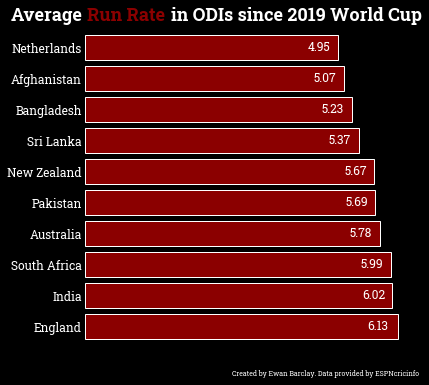

In [5]:
# Variables
index = ranking.index
values = ranking['RPO']
plot_title = 'Average Run Rates in ODIs since 2019 World Cup'
title_size = 27
subtitle = 'Source: ESPNcricinfo'
x_label = 'Run Rate'
filename = 'odi_rpo'

filler = "black"
primary = "orangered"
background = "black"
text_color = "darkred"

#create descending chart
ranking.sort_values(by='RPO', inplace=True, ascending=True)

#create figure
fig, ax = plt.subplots(figsize=(6,5))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

txt = fig.text(0.12, 0.95, "Average", ha="center", va="bottom",color="white",fontproperties = bold_font,fontsize=18)
#txt.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='darkred')])
txt1 = fig.text(0.304, 0.95, "Run Rate", ha="center", va="bottom",color = "darkred",fontproperties = bold_font,fontsize=18)
#txt1.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='w')])
txt2 = fig.text(0.7,0.95,"in ODIs since 2019 World Cup", ha="center", va="bottom",color="white",fontproperties = bold_font,fontsize=18)
#txt2.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='darkred')])
#adding a grid
ax.grid(False)
#ax.grid(ls="dotted",lw=0.5,color=text_color,zorder=1)
#mpl.pyplot.viridis()

#add bars
bar = ax.barh(index, values,color=text_color)
#plt.tight_layout()
#ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

#title
#s= "Average <{}> in ODIs since 2019 World Cup"
#htext.fig_text(0.15,1.0,s.format(x_label),
              # highlight_textprops=[{"color": 'maroon', "weight": 'bold',"fontsize": 22}],color = "white",fontproperties=bold_font, size = 22,weight = "bold")

#title = plt.title(plot_title, pad=20, fontsize=22,fontproperties = bold_font,color='white')
#title.set_position([.45,0.96])
#plt.subplots_adjust(top=0.9, bottom=0.1)


ax.tick_params(axis="y",length=0, colors = 'white')
#labels
            
rects = ax.patches
# Place a label for each bar
for rect in rects:
    # Get X and Y placement of label from rect
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label; change to your liking
    space = -30
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: place label to the left of the bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label to the right
        ha = 'right'

    # Use X value as label and format number
    label = '{:,.2f}'.format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at bar end
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords='offset points', # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha,                      # Horizontally align label differently for positive and negative values
        color = 'white',
        fontproperties = title_font,
        fontsize = 12)            # Change label color to white

#labels
#Set subtitle
#tfrom = ax.get_xaxis_transform()
#ann = ax.annotate(subtitle, xy=(1, 1), xycoords=tfrom, bbox=dict(boxstyle='square,pad=1', fc='black', ec='none',color='white'))

#adding credits
fig.text(0.55,-0.025,"Created by Ewan Barclay. Data provided by ESPNcricinfo",
        fontstyle="italic",fontproperties=title_font,size=7,color="white")

#Set x-label
#ax.set_xlabel(x_label, color='white',fontproperties = title_font)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.gca().set_xticklabels([])
plt.yticks(fontproperties = title_font,fontsize = 12)
plt.tight_layout()
plt.savefig("plots/odi_runrate_s2019_4", bbox_inches="tight", facecolor=background, edgecolor=background, dpi=300)
plt.show()

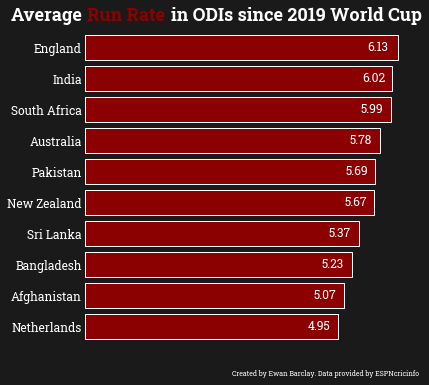

In [6]:
# Variables
index = ranking.index
values = ranking['RPO']
filename = 'odi_rpo'
background = "#1A1A1A"
text_color = "darkred"

#create descending chart
ranking.sort_values(by='RPO', inplace=True, ascending=True)

#create figure
fig, ax = plt.subplots(figsize=(6,5))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

fig.text(0.12, 0.95, "Average", ha="center", va="bottom",color="white",fontproperties = bold_font,fontsize=18)
fig.text(0.304, 0.95, "Run Rate", ha="center", va="bottom",color = "darkred",fontproperties = bold_font,fontsize=18)
fig.text(0.7,0.95,"in ODIs since 2019 World Cup", ha="center", va="bottom",color="white",fontproperties = bold_font,fontsize=18)

#adding a grid
ax.grid(False)

#add bars
bar = ax.barh(index, values,color=text_color)

ax.tick_params(axis="y",length=0, colors = 'white')

#labels            
rects = ax.patches
# Place a label for each bar
for rect in rects:
    # Get X and Y placement of label from rect
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label; change to your liking
    space = -30
    # Vertical alignment for positive values
    ha = 'left'
    # Use X value as label and format number
    label = '{:,.2f}'.format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at bar end
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords='offset points', # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha,                      # Horizontally align label differently for positive and negative values
        color = 'white',
        fontproperties = title_font,
        fontsize = 12)            # Change label color to white

#adding credits
fig.text(0.55,-0.025,"Created by Ewan Barclay. Data provided by ESPNcricinfo",
        fontstyle="italic",fontproperties=title_font,size=7,color="white")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.gca().set_xticklabels([])
plt.yticks(fontproperties = title_font,fontsize = 12)
plt.tight_layout()
plt.savefig("plots/odi_runrate_s2019", bbox_inches="tight", facecolor=background, edgecolor=background, dpi=300)
plt.show()

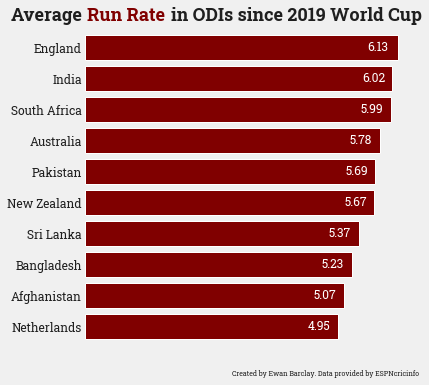

In [7]:
# Variables
index = ranking.index
values = ranking['RPO']
filename = 'odi_rpo'
background = "#F0F0F0"
text_color = "maroon"
text_color2 = "#1F1F1F"
#create descending chart
ranking.sort_values(by='RPO', inplace=True, ascending=True)

#create figure
fig, ax = plt.subplots(figsize=(6,5))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

fig.text(0.12, 0.95, "Average", ha="center", va="bottom",color= text_color2,fontproperties = bold_font,fontsize=18)
fig.text(0.304, 0.95, "Run Rate", ha="center", va="bottom",color = text_color,fontproperties = bold_font,fontsize=18)
fig.text(0.7,0.95,"in ODIs since 2019 World Cup", ha="center", va="bottom",color= text_color2,fontproperties = bold_font,fontsize=18)

#adding a grid
ax.grid(False)

#add bars
bar = ax.barh(index, values,color=text_color)

ax.tick_params(axis="y",length=0, colors = text_color2)

#labels            
rects = ax.patches
# Place a label for each bar
for rect in rects:
    # Get X and Y placement of label from rect
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label; change to your liking
    space = -30
    # Vertical alignment for positive values
    ha = 'left'
    # Use X value as label and format number
    label = '{:,.2f}'.format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at bar end
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords='offset points', # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha,                      # Horizontally align label differently for positive and negative values
        color = 'white',
        fontproperties = title_font,
        fontsize = 12)            # Change label color to white

#adding credits
fig.text(0.55,-0.025,"Created by Ewan Barclay. Data provided by ESPNcricinfo",
        fontstyle="italic",fontproperties=title_font,size=7,color= text_color2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.gca().set_xticklabels([])
plt.yticks(fontproperties = title_font,fontsize = 12)
plt.tight_layout()
plt.savefig("plots/odi_runrate_s2019_2", bbox_inches="tight", facecolor=background, edgecolor=background, dpi=300)
plt.show()

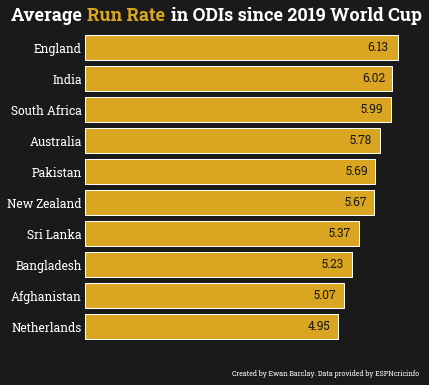

In [8]:
# Variables
index = ranking.index
values = ranking['RPO']
filename = 'odi_rpo'
background = "k"
text_color = "goldenrod"
text_color2 = "white"
#create descending chart
ranking.sort_values(by='RPO', inplace=True, ascending=True)

#create figure
fig, ax = plt.subplots(figsize=(6,5))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

fig.text(0.12, 0.95, "Average", ha="center", va="bottom",color= text_color2,fontproperties = bold_font,fontsize=18)
fig.text(0.304, 0.95, "Run Rate", ha="center", va="bottom",color = text_color,fontproperties = bold_font,fontsize=18)
fig.text(0.7,0.95,"in ODIs since 2019 World Cup", ha="center", va="bottom",color= text_color2,fontproperties = bold_font,fontsize=18)

#adding a grid
ax.grid(False)

#add bars
bar = ax.barh(index, values,color=text_color)

ax.tick_params(axis="y",length=0, colors = text_color2)

#labels            
rects = ax.patches
# Place a label for each bar
for rect in rects:
    # Get X and Y placement of label from rect
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label; change to your liking
    space = -30
    # Vertical alignment for positive values
    ha = 'left'
    # Use X value as label and format number
    label = '{:,.2f}'.format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at bar end
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords='offset points', # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha,                      # Horizontally align label differently for positive and negative values
        color = background,
        fontproperties = title_font,
        fontsize = 12)            # Change label color to white

#adding credits
fig.text(0.55,-0.025,"Created by Ewan Barclay. Data provided by ESPNcricinfo",
        fontstyle="italic",fontproperties=title_font,size=7,color= text_color2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.gca().set_xticklabels([])
plt.yticks(fontproperties = title_font,fontsize = 12)
plt.tight_layout()
plt.savefig("plots/odi_runrate_s2019_3", bbox_inches="tight", facecolor=background, edgecolor=background, dpi=300)
plt.show()

['England', 'India', 'South Africa', 'Australia', 'Pakistan', 'New Zealand', 'Sri Lanka', 'Bangladesh', 'Afghanistan', 'Netherlands']
[6.13, 6.02, 5.99, 5.78, 5.69, 5.67, 5.37, 5.23, 5.07, 4.95]


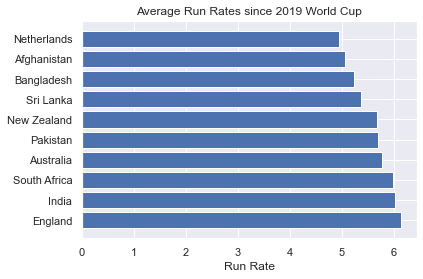

In [9]:
#getting data
x = df.RPO.tolist()
y = df.Team.tolist()
print(y)
print(x)
plt.barh(y, x)

# setting label of x-axis
plt.xlabel("Run Rate")
plt.title("Average Run Rates since 2019 World Cup")
plt.show()